In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split 


In [4]:
df = pd.read_csv("winequality-red (2).csv")

In [5]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
m=pd.DataFrame(df)

In [7]:
m["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [9]:
m.shape

(1599, 12)

In [12]:
m.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
m.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
m.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
m.plt(kind="box",subplot=2,layout(6,6),figsize=(10,10))




plt.show()

SyntaxError: positional argument follows keyword argument (3503746570.py, line 1)

<Figure size 1000x1000 with 0 Axes>

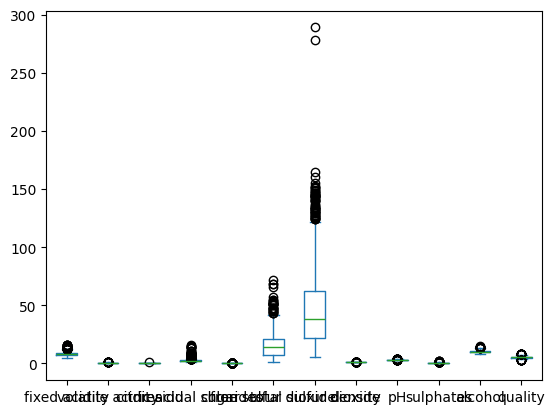

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
m.plot(kind="box")
plt.show()

In [20]:
from scipy.stats import zscore

In [25]:
z= np.abs(zscore(m))            #threshold removes the value from outlier which is less than outlier 
threshold=3
print(np.where(z<3))
b=m[(z<3).all(axis=1)]

(array([   0,    0,    0, ..., 1598, 1598, 1598]), array([ 0,  1,  2, ...,  9, 10, 11]))


In [31]:
b.shape    # after standardization

(1451, 12)

<Axes: xlabel='quality', ylabel='count'>

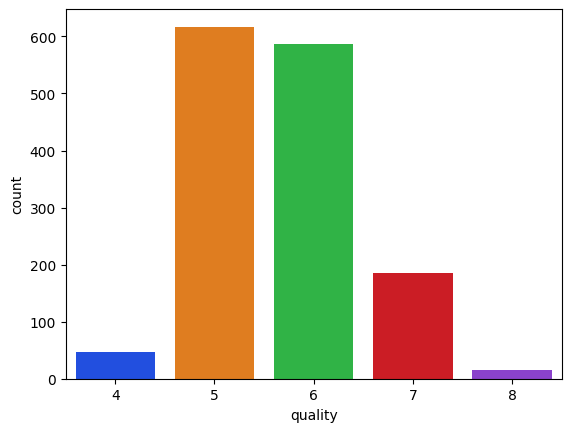

In [37]:
sns.countplot(x="quality",palette="bright",data=b)

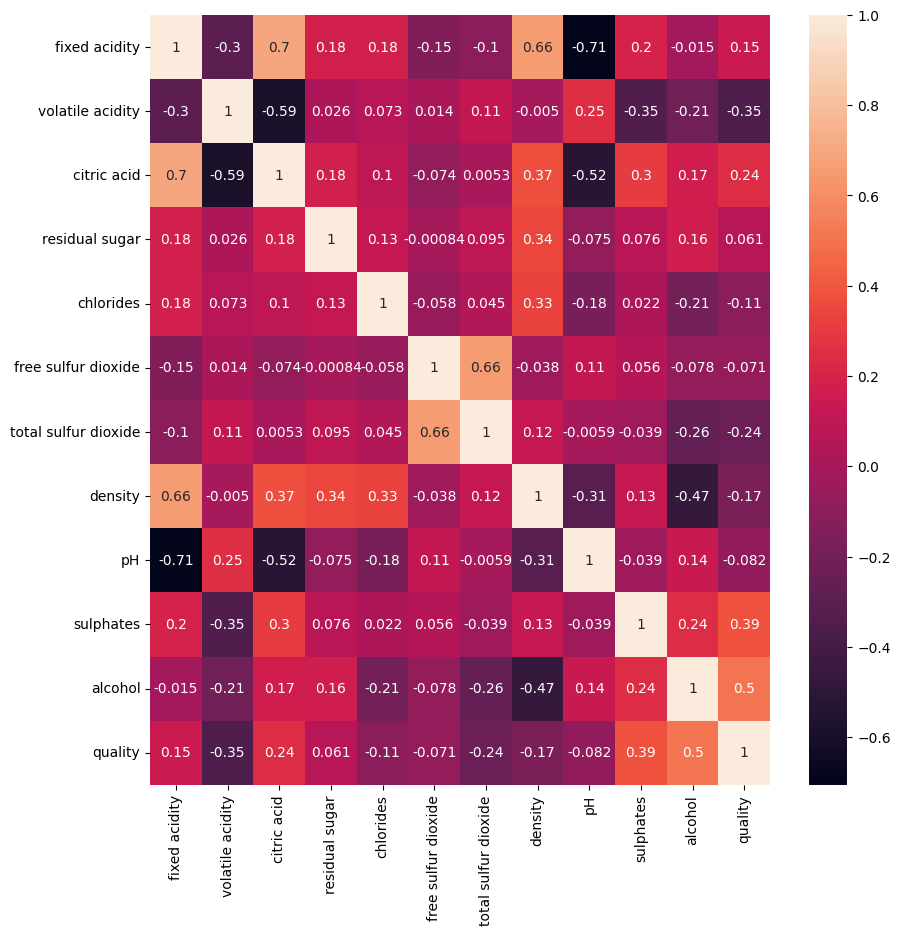

In [47]:
cor= b.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)
plt.show()

In [51]:
b["quality"].value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

In [55]:
# Features: all columns except 'quality'
x = b.drop("quality", axis=1)

# Labels: binary classification based on quality
y = b["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)


In [57]:
y.value_counts()


quality
0    1250
1     201
Name: count, dtype: int64

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [59]:
x_train.shape

(1160, 11)

In [62]:
dtc=DecisionTreeClassifier()


In [63]:
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [64]:
pre = dtc.predict_proba(x_test)[:,1]
pre

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pre)


In [68]:
print("fpr:", fpr, "tpr:", tpr, "thresholds:", thresholds)


fpr: [0.         0.07287449 1.        ] tpr: [0.         0.61363636 1.        ] thresholds: [inf  1.  0.]


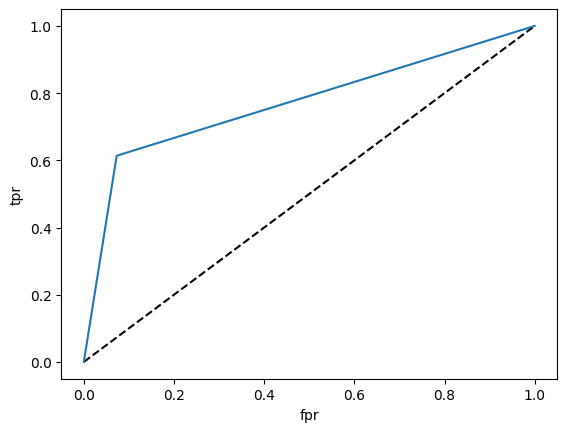

In [71]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='dtc')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [76]:
ac= roc_auc_score(y_test,dtc.predict(x_test))
ac

AUC Score: 0.7703809348546191


In [ ]:
from sklearn.metrics import roc_auc_score

y_scores = dtc.predict_proba(x_test)[:, 1]  # Probabilities for class 1
ac = roc_auc_score(y_test, y_scores)
print("AUC Score:", ac)


In [77]:
print("accuracy score of",accuracy_score(y_test,pre))

NameError: name 'accuracy_score' is not defined

In [78]:
from sklearn.metrics import accuracy_score

pre = dtc.predict(x_test)  # predicted labels
print("accuracy score of", accuracy_score(y_test, pre))


accuracy score of 0.8797250859106529


In [80]:
from sklearn.metrics import confusion_matrix

pre = dtc.predict(x_test)  # predicted labels
print("Confusion matrix:\n", confusion_matrix(y_test, pre))


Confusion matrix:
 [[229  18]
 [ 17  27]]


In [81]:
from sklearn.metrics import classification_report

pre = dtc.predict(x_test)  # predicted labels
print("Confusion matrix:\n", classification_report(y_test, pre))


Confusion matrix:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       247
           1       0.60      0.61      0.61        44

    accuracy                           0.88       291
   macro avg       0.77      0.77      0.77       291
weighted avg       0.88      0.88      0.88       291



In [85]:
def qual(q):
    q=q.reshape(1,-1)
    pro=dtc.predict(q)
    print("predicted value of q is : ",pro)
    if(pro==1):
        print("wine quality is good")
    else:
        print("Wine quality is poor")

In [86]:
q=np.array([7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.09946,3.39,0.47,10.0])

In [87]:
qual(q)

predicted value of q is :  [1]
wine quality is good


In [ ]:
head